In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('323 Dataset.csv')
features = df[['Load Capacity(in tons)', 'Fuel Efficiency', 'Distance (km)', 'Terrain Type', 'Weather Condition']]
target = df['Status']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

numeric_features = ['Load Capacity(in tons)', 'Fuel Efficiency', 'Distance (km)']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['Terrain Type', 'Weather Condition']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.415
Classification Report:
               precision    recall  f1-score   support

   Completed       0.41      0.40      0.41       100
     Delayed       0.42      0.43      0.42       100

    accuracy                           0.41       200
   macro avg       0.41      0.42      0.41       200
weighted avg       0.41      0.41      0.41       200



In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


df = pd.read_csv('323 Dataset.csv')
df['Distance per Fuel Efficiency'] = df['Distance (km)'] / df['Fuel Efficiency']


features = df[['Load Capacity(in tons)', 'Fuel Efficiency', 'Distance (km)', 'Terrain Type', 'Weather Condition', 'Distance per Fuel Efficiency']]
target = df['Status']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

numeric_features = ['Load Capacity(in tons)', 'Fuel Efficiency', 'Distance (km)', 'Distance per Fuel Efficiency']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['Terrain Type', 'Weather Condition']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

   Completed       0.54      0.51      0.53       100
     Delayed       0.54      0.57      0.55       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


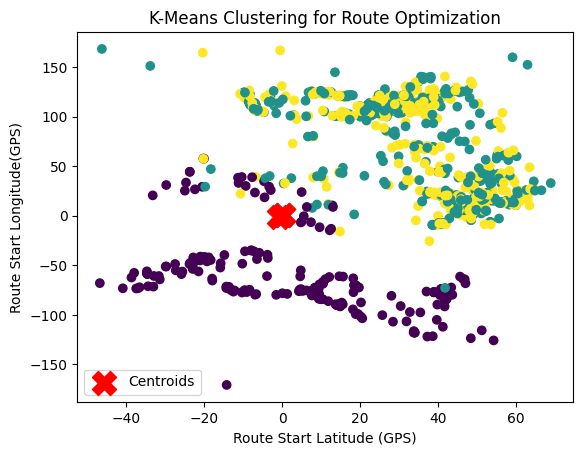

           ID  Cluster
0   EH3262-NH        1
1   XO0539-RP        0
2   NV8033-EW        0
3   ZU7922-RD        2
4   GE8785-SC        1
..        ...      ...
95  UQ2038-FJ        0
96  BG3586-QX        1
97  DJ6056-KT        1
98  OV7286-OD        1
99  GF1266-WR        0

[100 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

data = pd.read_csv('323 Dataset.csv')
features = ['Route Start Latitude (GPS)', 'Route Start Longitude(GPS)', 'Distance (km)', 'Terrain Type', 'Weather Condition']

numerical_features = ['Route Start Latitude (GPS)', 'Route Start Longitude(GPS)', 'Distance (km)']
categorical_features = ['Terrain Type', 'Weather Condition']

numerical_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


chosen_k = 3

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=chosen_k, random_state=42))
])


data['Cluster'] = pipeline.fit_predict(data[features])


plt.scatter(data['Route Start Latitude (GPS)'], data['Route Start Longitude(GPS)'], c=data['Cluster'], cmap='viridis')
plt.scatter(pipeline.named_steps['kmeans'].cluster_centers_[:, 0], pipeline.named_steps['kmeans'].cluster_centers_[:, 1], s=300, marker='X', c='red', label='Centroids')
plt.title('K-Means Clustering for Route Optimization')
plt.xlabel('Route Start Latitude (GPS)')
plt.ylabel('Route Start Longitude(GPS)')
plt.legend()
plt.show()


print(data[['ID', 'Cluster']].head(100))






In [ ]:
import csv
import random

# Function to randomly assign trucks
def random_assignment(trucks, packages):
    assignments = []
    for package in packages:
        truck = random.choice(trucks)
        assignments.append((package, truck))
    return assignments
# Function to calculate the cost of assignments
def calculate_cost(individual, trucks):
    truck_loads = {truck['name']: 0 for truck in trucks}
    for package, truck in individual:
        truck_loads[truck['name']] += package['weight']
    max_load = max(truck_loads.values())
    return max_load

# Function for roulette wheel selection
def roulette_selection(fitness, population_size):
    total_fitness = sum(fitness)
    selected_value = random.uniform(0, total_fitness)
    cumulative_fitness = 0
    for i, f in enumerate(fitness):
        cumulative_fitness += f
        if cumulative_fitness >= selected_value:
            return i

# Function for crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Function for mutation
def mutation(individual, trucks):
    mutated_individual = []
    for gene in individual:
        if random.random() < MUTATION_RATE:
            mutated_gene = random.choice(trucks)
        else:
            mutated_gene = gene
        mutated_individual.append(mutated_gene)
    return mutated_individual

# Function for Simple Genetic Algorithm (SGA)
def sga(trucks, packages):
    population = [random_assignment(trucks, packages) for _ in range(POP_SIZE)]

    fitness = [calculate_cost(individual, trucks) for individual in population]

    best_solution = population[fitness.index(min(fitness))]
    best_fitness = min(fitness)


    while True:

        selected_indices = [roulette_selection(fitness, POP_SIZE) for _ in range(POP_SIZE)]
        offspring = []
        for i in range(POP_SIZE):
            parent1 = population[selected_indices[i]]
            if random.random() < CROSSOVER_RATE and i < POP_SIZE - 1:
                parent2 = population[selected_indices[i + 1]]
                child1, child2 = crossover(parent1, parent2)
                offspring.append(child1)
                offspring.append(child2)
            else:
                offspring.append(parent1)

        offspring_fitness = [calculate_cost(ind, trucks) for ind in offspring]

        for i in range(POP_SIZE):
            if offspring_fitness[i] < fitness[i]:
                population[i] = offspring[i]
                fitness[i] = offspring_fitness[i]

        if abs(best_fitness - min(fitness)) < 0.5:
            break

    # Perform local search
    current_solution = best_solution
    current_fitness = best_fitness
    while True:
        new_fitness = calculate_cost(current_solution, trucks)
        if abs(best_fitness - new_fitness) < 0.5:
            break

        current_fitness = new_fitness


    normal_solution = population[0]
    normal_cost = fitness[0]

    print("\n--- Results ---")
    print("Normal Solution:")
    for package, truck in normal_solution:
        print(f"  Package: {package['name']}, Truck: {truck['name']}")
    print(f"Normal Cost: {normal_cost:.2f}")
    print("\nBest Solution:")
    for package, truck in best_solution:
        print(f"  Package: {package['name']}, Truck: {truck['name']}")


    print(f"Best Cost: {best_fitness:.2f}")

    return normal_solution, normal_cost, best_solution, best_fitness

random.seed(42)
POP_SIZE = 50
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8


trucks = []
packages = []

with open('trucks.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        truck_capacity = row['TruckCapacity(kgs)']
        package_weight = row['PackageWeight(kgs)']
        package_distance = row['PackageDistance(kms)']

        if truck_capacity and package_weight and package_distance:
            truck = {'name': row['TruckID'], 'capacity': int(truck_capacity)}
            package = {'name': row['PackageID'], 'weight': int(package_weight), 'distance': int(package_distance)}
            trucks.append(truck)
            packages.append(package)

normal_solution, normal_cost, best_solution, best_fitness = sga(trucks, packages)



--- Results ---
Normal Solution:
  Package: ABC123, Truck: GV2229-KA
  Package: XYZ789, Truck: UG0812-HJ
  Package: DEF456, Truck: ZH2611-TP
  Package: GHI789, Truck: IN9539-VI
  Package: JKL012, Truck: QL2870-ZN
  Package: MNO345, Truck: XG8954-CF
  Package: PQR678, Truck: TJ3029-AF
  Package: STU901, Truck: SE0953-CE
  Package: VWX234, Truck: YT5059-MV
  Package: YZA567, Truck: XX6481-OE
  Package: BCD890, Truck: JZ4046-TC
  Package: EFG123, Truck: NV8033-EW
  Package: HIJ456, Truck: CZ7109-YC
  Package: KLM789, Truck: GZ8109-YS
  Package: NOP012, Truck: UW8617-XE
  Package: QRS345, Truck: UG0812-HJ
  Package: TUV678, Truck: UU0697-RZ
  Package: WXY901, Truck: UK9066-BZ
  Package: ZAB234, Truck: EW9020-EY
  Package: CDE567, Truck: TX3796-ID
  Package: FGH890, Truck: EH3262-NH
  Package: IJK123, Truck: ET0168-OD
  Package: LMN456, Truck: VH2985-GB
  Package: OPQ789, Truck: UG0812-HJ
  Package: RST012, Truck: UW8617-XE
  Package: UVW345, Truck: ZH2611-TP
  Package: XYZ678, Truck: ZQ35